## 1. VSQL Introduction

Variational Shadow Quantum Learning (VSQL) is a hybird quantum-classical framework for supervised quantum learning, which utilizes parameterized quantum circuits and classical shadows. Unlike commonly used variational quantum algorithms, the VSQL method extracts "local" features from the subspace instead of the whole Hilbert space.

## 2. Introduction to the Model Principle

The flow chart of VSQL is as follows.

![pipeline](https://ai-studio-static-online.cdn.bcebos.com/2b806cc0405e425995df1786a5c5976196c5ca83697647d9ae70ac7cc0bf83c9 "Flow chart of VSQL")
<div style="text-align:center">Flow chart of VSQL</div>

The training steps are as below.

1. Encode a classical data point $\mathbf{x}^i$ into a quantum state $\left|\mathbf{x}^i\right>$.
2. Prepare a parameterized local quantum circuit $U(\mathbf{\theta})$ and initialize its parameters $\mathbf{\theta}$.
3. Apply $U(\mathbf{\theta})$ on the first few qubits. Then, obtain a shadow feature via measuring a local observable, for instance, $X\otimes X\cdots \otimes X$, on these qubits.
4. Sliding down $U(\mathbf{\theta})$ one qubit each time, repeat step 3 until the last qubit has been covered.
5. Feed all shadow features obtained from steps 3-4 to an FCNN and get the predicted label $\tilde{\mathbf{y}}^i$ through an activation function. For multi-label classification problems, we use the softmax activation function.
5. Repeat steps 3-5 until all data points in the data set have been processed. Then calculate the loss function $\mathcal{L}(\mathbf{\theta}, \mathbf{W}, \mathbf{b})$.
6. Adjust the parameters $\mathbf{\theta}$, $\mathbf{W}$, and $\mathbf{b}$ through optimization methods such as gradient descent to minimize the loss function. Then we get the optimized model $\mathcal{F}$.

Since VSQL only extracts local shadow features, it can be easily implemented on quantum devices with topological connectivity limits. Besides, since the $U(\mathbf{\theta})$ used in circuits are identical, the number of parameters involved is significantly smaller than other commonly used variational quantum classifiers.

### 2.1 Introduction to local shadow circuits

Now, we are ready for the next step. Before diving into details of the circuit, we need to clarify several parameters:
- $n$: the number of qubits encoding each data point.
- $n_{qsc}$: the width of the quantum shadow circuit . We only apply $U(\mathbf{\theta})$ on consecutive $n_{qsc}$ qubits each time.
- $D$: the depth of the circuit, indicating the repeating times of a layer in $U(\mathbf{\theta})$.

Here, we give an example where $n = 4$ and $n_{qsc} = 2$.

We first apply $U(\mathbf{\theta})$ to the first two qubits and obtain the shadow feature $O_1$.

![qubit0](https://ai-studio-static-online.cdn.bcebos.com/818b3c2bac5d4ef0b73e223c357b49d688649f036d7b4d798fb54838a555c6e6 "The first circuit")
<div style="text-align:center">The first circuit</div>

Then, we prepare a copy of the same input state $\left|\mathbf{x}^i\right>$, apply $U(\mathbf{\theta})$ to the two qubits in the middle, and obtain the shadow feature $O_2$.

![qubit1](https://ai-studio-static-online.cdn.bcebos.com/b58591c4adfc4d18a657cf1b811f4fc0c6dced8fd6b54724a78fbe1c86bb32dc "The second circuit")
<div style="text-align:center">The second circuit</div>

Finally, we prepare another copy of the same input state, apply $U(\mathbf{\theta})$ to the last two qubits, and obtain the shadow feature $O_3$. Now we are done with this data point!

![qubit2](https://ai-studio-static-online.cdn.bcebos.com/57089cc1c0dd412ba984a0b12e20f5d88585aaa4d293455aa9f6bb7869d7f771 "The last circuit")
<div style="text-align:center">The last circuit</div>

In general, we will need to repeat this process for $n - n_{qsc} + 1$ times for each data point. One thing to point out is that we only use one shadow circuit in the above example. When sliding the shadow circuit $U(\mathbf{\theta})$ through the $n$-qubit Hilbert space, the same parameters $\mathbf{\theta}$ are used. You can use more shadow circuits for complicated tasks, and different shadow circuits should have different parameters $\mathbf{\theta}$.

Below, we will use a 2-local shadow circuit, i.e., $n_{qsc}=2$ for the MNIST classification task, and the circuit's structure is shown in the follow figure.

![2-local](https://ai-studio-static-online.cdn.bcebos.com/0c1035262cb64f61bd3cc87dbf53253aa6a7ecc170634c4db8dd71d576a9409c "The 2-local shadow circuit design")
<div style="text-align:center">The 2-local shadow circuit design</div>

The circuit layer in the dashed box is repeated for $D$ times to increase the expressive power of the quantum circuit. The structure of the circuit is not unique. You can try to design your own circuit.

## 3. Model Performance

The binary classification effect of VSQL on MNIST dataset is as follows.

![binary-classification](https://ai-studio-static-online.cdn.bcebos.com/03c38b174d0e47ae9dbeea6dfda1333d6d3aa74209594324b78c9159b72e7e8a "Binary classification performance")
<div style="text-align:center">Binary classification performance</div>

The ten-class classification effect of VSQL on the MNIST dataset is as follows.

![10-classification](https://ai-studio-static-online.cdn.bcebos.com/54a0273672ad4ec5ba6b7d73b3b225f8d97380c43ceb495a82d16a258117182b "Ten-class classification performance")
<div style="text-align:center">Ten-class classification performance</div>

As shown in the tables, VSQL can achieve higher classification accuracy with fewer parameters than other quantum neural networks. Compared with classical neural networks, VSQL can also achieve similar results in ten-class classification tasks with fewer parameters. And when the amount of data is small, VSQL can achieve better results than classical neural networks.

## 4. How to Use the Model

Configure the environment according to the following code.

In [1]:
# Install the paddle quantum
%pip install paddle-quantum
# Download the pretrained model
!wget https://release-data.cdn.bcebos.com/PaddleQuantum/vsql.pdparams

--2022-11-24 13:45:54--  https://release-data.cdn.bcebos.com/PaddleQuantum/vsql.pdparams
Resolving release-data.cdn.bcebos.com (release-data.cdn.bcebos.com)... 222.35.73.1
Connecting to release-data.cdn.bcebos.com (release-data.cdn.bcebos.com)|222.35.73.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 857 [application/octet-stream]
Saving to: ‘vsql.pdparams.2’

vsql.pdparams.2     100%[===================>]     857  --.-KB/s    in 0s      

2022-11-24 13:45:54 (817 MB/s) - ‘vsql.pdparams.2’ saved [857/857]



Next, the model can be loaded and tested.

In [2]:
# Import the required packages
import os
import warnings

warnings.filterwarnings('ignore')
os.environ['PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION'] = 'python'

import numpy as np
import paddle
import paddle_quantum as pq
import matplotlib.pyplot as plt
from paddle_quantum.qml.vsql import VSQL

# Set model parameters
num_qubits = 10
num_shadow = 2
classes = [0, 1]
num_classes = len(classes)
depth = 1

# Load the trained model
model = VSQL(
    num_qubits=num_qubits,
    num_shadow=num_shadow,
    num_classes=num_classes,
    depth=depth,
)
state_dict = paddle.load('./vsql.pdparams')
model.set_state_dict(state_dict)

/Users/wangzihe/opt/anaconda3/envs/py37/lib/python3.7/site-packages/scipy/linalg/__init__.py:212: DeprecationWarning: The module numpy.dual is deprecated.  Instead of using dual, use the functions directly from numpy or scipy.
  from numpy.dual import register_func
/Users/wangzihe/opt/anaconda3/envs/py37/lib/python3.7/site-packages/scipy/sparse/sputils.py:16: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.
  supported_dtypes = [np.typeDict[x] for x in supported_dtypes]
/Users/wangzihe/opt/anaconda3/envs/py37/lib/python3.7/site-packages/scipy/special/orthogonal.py:81: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; f

--2022-11-24 13:46:01--  https://ai-studio-static-online.cdn.bcebos.com/088dc9dbabf349c88d029dfd2e07827aa6e41ba958c5434bbd96bc167fc65347
Resolving ai-studio-static-online.cdn.bcebos.com (ai-studio-static-online.cdn.bcebos.com)... 222.35.73.1
Connecting to ai-studio-static-online.cdn.bcebos.com (ai-studio-static-online.cdn.bcebos.com)|222.35.73.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 290 [image/png]
Saving to: ‘data-0.png’

data-0.png          100%[===================>]     290  --.-KB/s    in 0s      

2022-11-24 13:46:02 (138 MB/s) - ‘data-0.png’ saved [290/290]



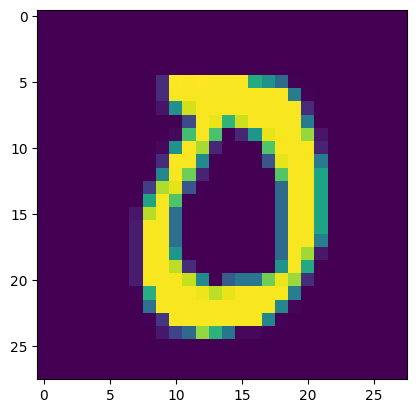

In [3]:
# Load handwritten digit 0
!wget https://ai-studio-static-online.cdn.bcebos.com/088dc9dbabf349c88d029dfd2e07827aa6e41ba958c5434bbd96bc167fc65347 -O data-0.png
image0 = plt.imread('data-0.png')
plt.imshow(image0)

--2022-11-24 13:46:03--  https://ai-studio-static-online.cdn.bcebos.com/c755f723af3d4a1c8f113f8ac3bd365406decd1be70944b7b7b9d41413e8bc7a
Resolving ai-studio-static-online.cdn.bcebos.com (ai-studio-static-online.cdn.bcebos.com)... 222.35.73.1
Connecting to ai-studio-static-online.cdn.bcebos.com (ai-studio-static-online.cdn.bcebos.com)|222.35.73.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 173 [image/png]
Saving to: ‘data-1.png’

data-1.png          100%[===================>]     173  --.-KB/s    in 0s      

2022-11-24 13:46:03 (165 MB/s) - ‘data-1.png’ saved [173/173]



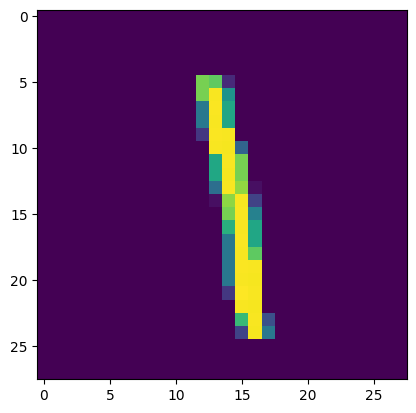

In [4]:
# Load handwritten digit 1
!wget https://ai-studio-static-online.cdn.bcebos.com/c755f723af3d4a1c8f113f8ac3bd365406decd1be70944b7b7b9d41413e8bc7a -O data-1.png
image1 = plt.imread('data-1.png')
plt.imshow(image1)

In [5]:
# Encoding images into quantum states
test_data = [np.array(image0).flatten(), np.array(image1).flatten()]
test_data = [np.pad(datum, pad_width=(0, 2 ** num_qubits - datum.size)) for datum in test_data]
test_data = [paddle.to_tensor(datum / np.linalg.norm(datum), dtype=pq.get_dtype()) for datum in test_data]
# Use the model to make predictions and get the corresponding probability
test_output = model(test_data)
test_prob = paddle.nn.functional.softmax(test_output)
print(
    f"For handwritten digits 0, "
    f"the model has {test_prob[0][0].item():3.2%} confidence that it is 0 "
    f"and {test_prob[0][1].item():3.2%} confidence that it is 1."
)
print(
    f"For handwritten digits 1, "
    f"the model has {test_prob[1][0].item():3.2%} confidence that it is 0 "
    f"and {test_prob[1][1].item():3.2%} confidence that it is 1."
)

/Users/wangzihe/opt/anaconda3/envs/py37/lib/python3.7/site-packages/paddle/tensor/creation.py:125: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if data.dtype == np.object:
/Users/wangzihe/opt/anaconda3/envs/py37/lib/python3.7/site-packages/paddle/fluid/framework.py:1104: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif dtype == np.bool:


For handwritten digits 0, the model has 89.22% confidence that it is 0 and 10.78% confidence that it is 1.
For handwritten digits 1, the model has 18.29% confidence that it is 0 and 81.71% confidence that it is 1.


## 5. Note

The model we provide is a binary classification model that can only be used to distinguish handwritten digits 0 and 1. For other classification tasks, it needs to be retrained.

## 6. Related papers and citations

```
@inproceedings{li2021vsql,
  title={VSQL: Variational shadow quantum learning for classification},
  author={Li, Guangxi and Song, Zhixin and Wang, Xin},
  booktitle={Proceedings of the AAAI Conference on Artificial Intelligence},
  volume={35},
  number={9},
  pages={8357--8365},
  year={2021}
}
```